# Яканин А.В 18-ИВТ-3 Вариант №9

## 9. NBA
### 1. Определите игрока, принявшего участие в наибольшем числе игр.
### 2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
### 3. Определите год, в котором наиболее интенсивно играли в баскетбол.
### 4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).
### 5. Постройте гистограмму по признаку Year.
### 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
### 7. Добавьте в набор данных признак, являющийся произведением двух других признаков.
### 8. Определите самое популярное имя среди игроков.


In [132]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [175]:
Df = pd.read_csv("D:\\Рабочий сто\\Yakanin\\ml_rob_nets_2020\\ml\\lab1\\Seasons_Stats.csv") #Создание таблицы
Df #Вывод таблицы

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


### 1. Определите игрока, принявшего участие в наибольшем числе игр.

In [177]:
status = Df["G"]>=Df["G"].max() # Используем для задания условия
player_name = Df[status]["Player"].iloc[0] #  Определение имени игрока
number_game = Df[status]["G"].iloc[0] # Определение числа сыгранных игр
print(f"Игрок, у которого больше всего сыгранных матчей: {player_name}")
print(f"Количество сыгранных матчей: {number_game}")

Игрок, у которого больше всего сыгранных матчей: Walt Bellamy*
Количество сыгранных матчей: 88.0


### 2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [200]:
D=Df[["Age", "G"]] #вывод двух столбцов таблицы
D

,Age,G
0,31.0,63.0
1,29.0,49.0
2,25.0,67.0
3,24.0,15.0
4,24.0,13.0
...,...,...
24686,24.0,62.0
24687,27.0,51.0
24688,20.0,19.0
24689,22.0,44.0


In [201]:
D=Df[['Age','G']].dropna()
#pearsonr(Df['Age'], Df['G'])
x = D['Age']
y = D['G']
pearson = scipy.stats.pearsonr(x, y)
spearman = scipy.stats.spearmanr(x, y)
print("Корреляция Пирсона:", spearman)
if spearman[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')
    
print("Корреляция :", pearson)
if pearson[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')

Корреляция Пирсона: SpearmanrResult(correlation=0.03842520100651231, pvalue=1.633138829299717e-09)
Нормальное значение p-value
Корреляция : (0.02739761078699679, 1.7146738628436644e-05)
Нормальное значение p-value


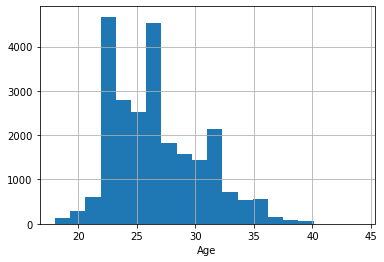

In [180]:
plt.xlabel("Age") # отображение названия оси возраста на гистограмме 
x.hist(bins=20)

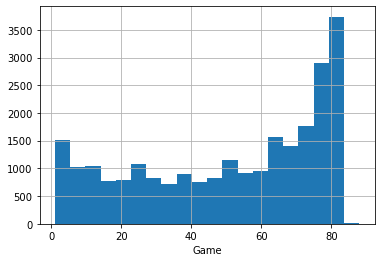

In [181]:
plt.xlabel("Game") # отображение названия оси игр на гистограмме
y.hist(bins=20)

### 3. Определите год, в котором наиболее интенсивно играли в баскетбол.

In [202]:
Df = pd.read_csv("D:\\Рабочий сто\\Yakanin\\ml_rob_nets_2020\\ml\\lab1\\Seasons_Stats.csv")
year_max = Df.groupby("Year")["G"].sum().idxmax()  #  Год, в котором наиболее интенсивно играли в баскетболм
print(f"Год, в котором наиболее интенсивно играли в баскетбол: {year_max}")

Год, в котором наиболее интенсивно играли в баскетбол: 2015.0


### 4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).

In [258]:
print("Позиция, на которой находится более результативный игрок: {}".format(Df[Df["PTS"]==Df["PTS"].max()].iloc[0].iloc[0]))
print("Позиция, на которой находится наименее результтивный игрок:: {}".format(Df[Df["PTS"]==Df["PTS"].min()]["PTS"].count()))

Позиция, на которой находится более результативный игрок: 1706
Позиция, на которой находится наименее результативный игрок:: 287


### 5. Постройте гистограмму по признаку Year.

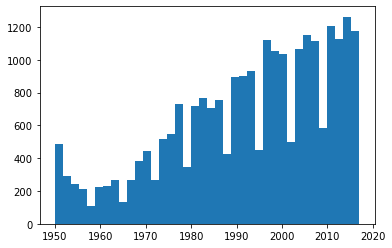

In [254]:
Df = pd.read_csv("D:\\Рабочий сто\\Yakanin\\ml_rob_nets_2020\\ml\\lab1\\Seasons_Stats.csv")
plt.hist(Df["Year"].dropna(), bins='auto')
plt.show()

### 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [260]:
Df = pd.read_csv("D:\\Рабочий сто\\Yakanin\\ml_rob_nets_2020\\ml\\lab1\\Seasons_Stats.csv")
Df.dropna()
print(f"Размер набора данных до удаления: {len(Df)}\nРазмер набора данных после удаления: {len(Df.dropna())}")

Размер набора данных до удаления: 24691
Размер набора данных после удаления: 0


### 7. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [259]:
Dff= Df
Dff["COM"] = Df.Age * Df.G
Dff.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,COM
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,1953.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1421.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,1675.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,360.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,312.0


### 8. Определите самое популярное имя среди игроков.

In [262]:
print(f"Имя {Df.Player.value_counts().head(1).index[0]} Повторяется: {Df.Player.value_counts().iloc[0]} раза")

Имя Eddie Johnson Повторяется: 33 раза
